In [1]:
#import libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#see all graphs in iphython notebook
%matplotlib inline

In [3]:
#read the dataset 
dataset=pd.read_csv('Indian_liver_patient 2.csv')

In [4]:
#preview of the data 
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
#info of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
#changing the data to 0(have no disease) and 1(have disease) from 2 and 1 for convenience
dataset['Dataset'] = dataset['Dataset'].map({2:0,1:1}) 

Text(0,0.5,'Frequency')

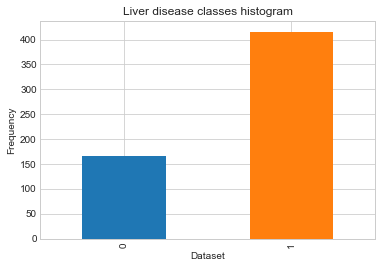

In [7]:
# checking the of the person suffering from liver disease
count_classes = pd.value_counts(dataset['Dataset'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")

In [8]:
#counting the number of patients 
dataset['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

In [9]:
#replacing missing values with 0
dataset['Albumin_and_Globulin_Ratio'].fillna(value=0, inplace=True)

In [10]:
#cross checking whether the missing values are replaced
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [11]:
dataset.describe() # check to whether feature scaling has to be performed or not 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.940566,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.327962,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.920000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [14]:
data_features=dataset.drop(['Dataset'],axis=1)
data_num_features=dataset.drop(['Gender','Dataset'],axis=1)
data_num_features.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


In [16]:
data_num_features.describe() 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.940566
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.327962
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.920000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=list(data_num_features.columns)
data_features_scaled=pd.DataFrame(data=data_features)
data_features_scaled[cols]=scaler.fit_transform(data_features[cols])
data_features_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,Female,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.123797
1,1.066637,Male,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.612077
2,1.066637,Male,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.154315
3,0.819356,Male,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.181378
4,1.684839,Male,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.649672


In [18]:
data_exp=pd.get_dummies(data_features_scaled)
data_exp.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.123797,1,0
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.612077,0,1
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.154315,0,1
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.181378,0,1
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.649672,0,1


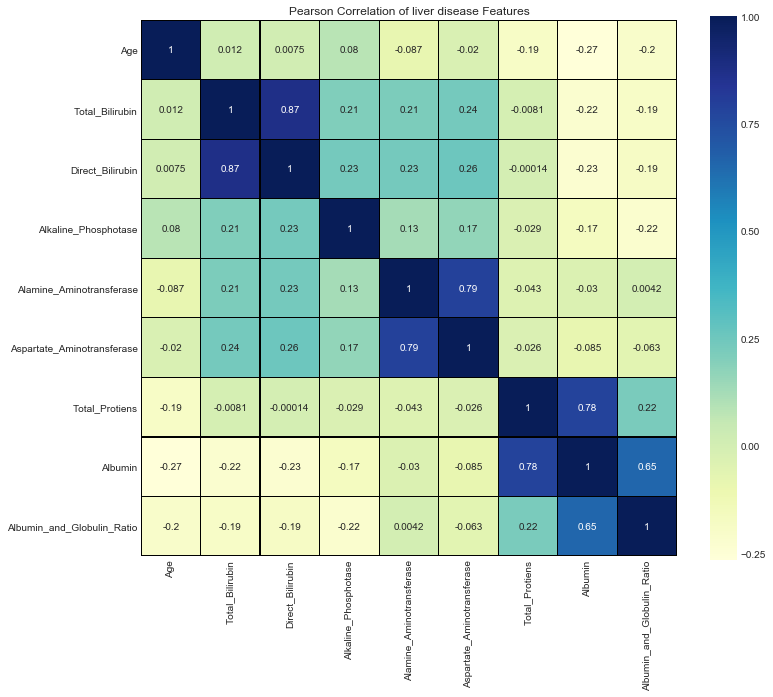

In [44]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of liver disease Features')
# Draw the heatmap using seaborn
sns.heatmap(data_num_features.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

Text(-0.4,210,'Female')

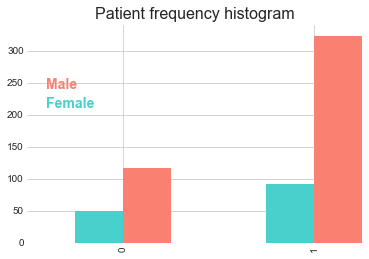

In [19]:
#calculate the number of male and female in each group
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

df1 = pd.value_counts(dataset.loc[dataset['Gender'] == 'Male']['Dataset'], sort = True).sort_index()
df2 = pd.value_counts(dataset.loc[dataset['Gender'] == 'Female']['Dataset'], sort = True).sort_index()
df1.plot(kind='bar', color='salmon', ax=ax, position=0, width=0.25)
df2.plot(kind='bar', color='mediumturquoise', ax=ax, position=1, width=0.25)

plt.title("Patient frequency histogram", fontsize=16)
plt.text(-0.4, 240, "Male", color='salmon', fontweight='bold', fontsize=14)
plt.text(-0.4, 210, "Female", color='mediumturquoise', fontweight='bold', fontsize=14)
    

In [20]:
#feature scaling the categorical variables
from sklearn.preprocessing import MinMaxScaler
simpleScaler=MinMaxScaler()
cols=list(dataset.drop(['Gender', 'Dataset'],axis=1).columns)
datasetScaled=pd.DataFrame(data=dataset)
datasetScaled[cols]=simpleScaler.fit_transform(dataset[cols])
datasetScaled.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,Female,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.321429,1
1,0.674419,Male,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.264286,1
2,0.674419,Male,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.317857,1


In [23]:
# introducing dummy variables in categorical variable field

datasetScaledEncoded=pd.get_dummies(dataset)
datasetScaledEncoded.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.321429,1,1,0
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.264286,1,0,1
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.317857,1,0,1


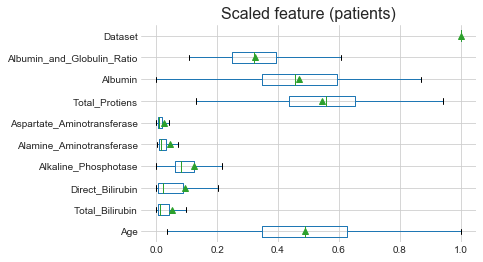

In [24]:
boxprops = dict(linestyle='-', color='k')
medianprops = dict(linestyle='-', color='k')
plt.figure()
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.title("Scaled feature (patients)", fontsize=16)
datasetScaledEncodedBoxPlotDF=datasetScaledEncoded.loc[datasetScaledEncoded['Dataset'] == 1].drop(
                                ['Gender_Male', 'Gender_Female'],axis=1)
#datasetScaledEncodedBoxPlotDF = datasetEncodedBoxPlotDF.sort_values(by=['Total_Bilirubin'], ascending=[True])
bp = datasetScaledEncodedBoxPlotDF.boxplot(vert=False, showmeans=True, showfliers=False,
                boxprops=boxprops,
                medianprops=medianprops)

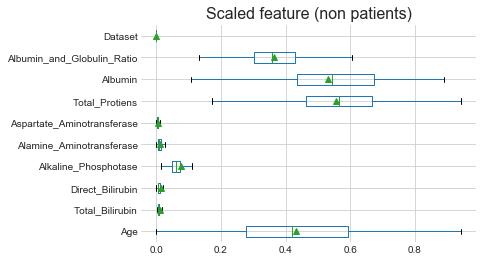

In [25]:
plt.figure()
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.title("Scaled feature (non patients)", fontsize=16)
datasetScaledEncodedBoxPlotDF=datasetScaledEncoded.loc[datasetScaledEncoded['Dataset'] == 0].drop(
                                ['Gender_Male', 'Gender_Female'],axis=1)
#datasetScaledEncodedBoxPlotDF = datasetEncodedBoxPlotDF.sort_values(by=['Total_Bilirubin'], ascending=[True])
bp = datasetScaledEncodedBoxPlotDF.boxplot(vert=False, showmeans=True, showfliers=False,
                boxprops=boxprops,
                medianprops=medianprops)

In [26]:
# The input variables/features are all the inputs except Dataset. 
#The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
X = datasetScaledEncoded.drop(['Gender_Male', 'Gender_Female','Dataset'], axis=1)
X.head(3)


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.321429
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.264286
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.317857


In [27]:
y = datasetScaledEncoded['Dataset']

In [28]:

# Correlation
liver_corr = X.corr()

In [29]:
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.203418
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.192539
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.186023
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.217864
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,0.004184
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.062993
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.223185
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.654450
Albumin_and_Globulin_Ratio,-0.203418,-0.192539,-0.186023,-0.217864,0.004184,-0.062993,0.223185,0.654450,1.000000


In [30]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(408, 9)
(408,)
(175, 9)
(175,)


Gaussian Score: 
 55.64
Gaussian Test Score: 
 53.14
Accuracy: 
 0.5314285714285715
[[49  2]
 [80 44]]
             precision    recall  f1-score   support

          0       0.38      0.96      0.54        51
          1       0.96      0.35      0.52       124

avg / total       0.79      0.53      0.53       175



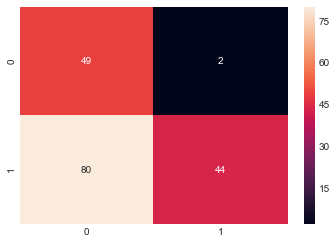

In [32]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [120]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Direct_Bilirubin,2.426283
3,Alkaline_Phosphotase,1.572575
4,Alamine_Aminotransferase,1.541360
1,Total_Bilirubin,1.212057
5,Aspartate_Aminotransferase,0.836477
0,Age,0.816795
6,Total_Protiens,0.784996
8,Albumin_and_Globulin_Ratio,-0.848906
7,Albumin,-0.919082


In [33]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 69.71
Accuracy: 
 0.6971428571428572
[[24 27]
 [26 98]]
             precision    recall  f1-score   support

          0       0.48      0.47      0.48        51
          1       0.78      0.79      0.79       124

avg / total       0.70      0.70      0.70       175



In [36]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

from sklearn.feature_selection import RFE
rfe =RFE(linear, n_features_to_select=3)
rfe.fit(X,y)

Linear Regression Score: 
 12.41
Linear Regression Test Score: 
 9.45
Coefficient: 
 [ 0.22361882  0.04446189  0.45937609  0.42494008  0.81021249 -0.28331378
  0.43999622 -0.45997364 -0.083915  ]
Intercept: 
 0.5094094686007857


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=3, step=1, verbose=0)

In [37]:
for i in range(len(rfe.ranking_)):
    if rfe.ranking_[i] == 1:
        print(X.columns.values[i])

Direct_Bilirubin
Alamine_Aminotransferase
Albumin


In [38]:
#I'm considering seven important features based on recursive feature elimination
#finX = datasetScaledEncoded[['Age','Direct_Bilirubin','Total_Protiens','Albumin', 'Gender_Female', 'Gender_Male']]
finX = datasetScaledEncoded[['Total_Protiens','Albumin', 'Gender_Male']]
finX.head(4)

,Total_Protiens,Albumin,Gender_Male
0,0.594203,0.521739,0
1,0.695652,0.500000,1
2,0.623188,0.521739,1
3,0.594203,0.543478,1


In [39]:
X_train, X_test, y_train, y_test = train_test_split(finX, y, test_size=0.30, random_state=101)

Logistic Regression Training Score: 
 71.81
Logistic Regression Test Score: 
 69.71
Coefficient: 
 [[ 1.01915685 -1.91048852  0.56204847]]
Intercept: 
 [0.86518512]
Accuracy: 
 0.6971428571428572
Confusion Matrix: 
 [[  0  51]
 [  2 122]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.00      0.00      0.00        51
          1       0.71      0.98      0.82       124

avg / total       0.50      0.70      0.58       175



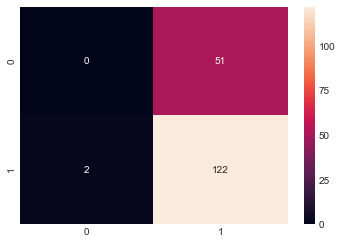

In [40]:
#Logistic Regression
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")


Logistic Regression Training Score: 
 71.81
Logistic Regression Test Score: 
 69.71
Coefficient: 
 [[ 1.01915685 -1.91048852  0.56204847]]
Intercept: 
 [0.86518512]
Accuracy: 
 0.6971428571428572
Confusion Matrix: 
 [[  0  51]
 [  2 122]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.00      0.00      0.00        51
          1       0.71      0.98      0.82       124

avg / total       0.50      0.70      0.58       175



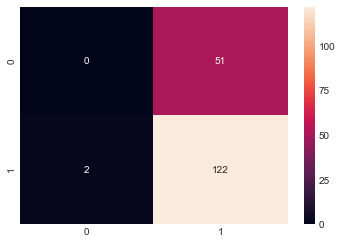

In [131]:
#Logistic Regression
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")


In [41]:
###Model evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest'],
    'Score': [ logreg_score, gauss_score, random_forest_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
0,Logistic Regression,71.81,69.71
2,Random Forest,100.00,69.71
1,Gaussian Naive Bayes,55.64,53.14
